In [1]:

# for some basic operations
import numpy as np 
import pandas as pd 
import plotly as py

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify
%matplotlib inline 

# for providing path
import os

In [2]:
df = pd.read_csv("/Users/AlokMadan/Downloads/netflix_titles.csv")

In [3]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,


In [4]:
df.describe()

,show_id,release_year,year_added,month_added
count,6.234000e+03,6234.00000,6223.000000,6223.000000
mean,7.670368e+07,2013.35932,2017.983288,6.837538
std,1.094296e+07,8.81162,1.204851,3.621890
min,2.477470e+05,1925.00000,2008.000000,1.000000
25%,8.003580e+07,2013.00000,2017.000000,4.000000
50%,8.016337e+07,2016.00000,2018.000000,7.000000
75%,8.024489e+07,2018.00000,2019.000000,10.000000
max,8.123573e+07,2020.00000,2020.000000,12.000000


In [5]:
list(df)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'year_added',
 'month_added',
 'season_count']

In [6]:
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [ ]:
# Content Type Split

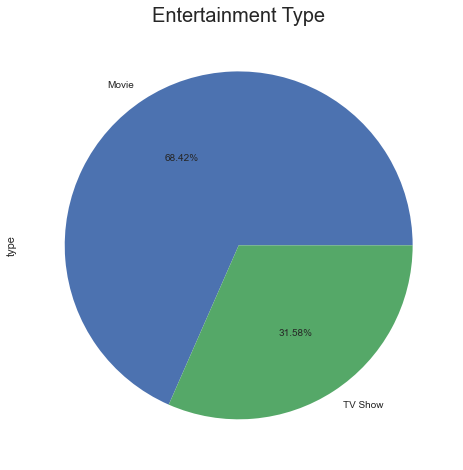

In [7]:
plt.style.use('seaborn')


df['type'].value_counts().head(15).plot.pie(figsize = (15, 8), autopct='%1.2f%%')

plt.title('Entertainment Type',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Content Ratings by Type

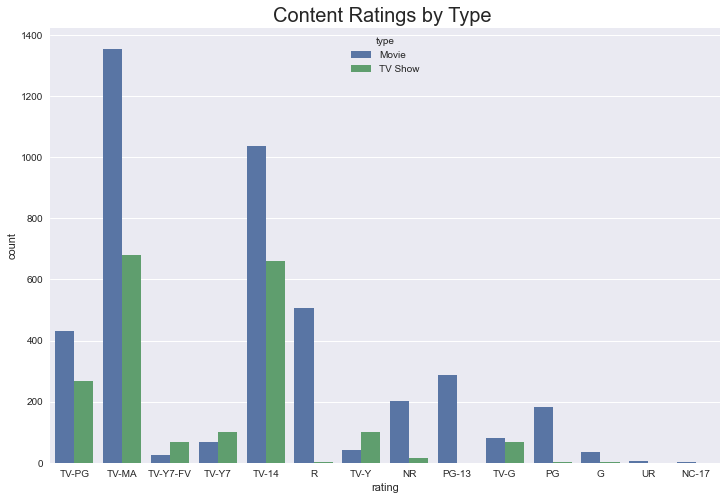

In [9]:
plt.figure(figsize = (12,8))
plt.title('Content Ratings by Type ',fontsize = 20)
sns.countplot(x='rating',data = df,hue='type')

In [ ]:
# Amount of Content added over time

In [12]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Amount of Content Added Over Time", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [ ]:
# Months in which content was added

In [13]:
col = 'month_added'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="Amount of Content Added by Month", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [ ]:
# 15 Oldest movies released on Netflix

In [16]:
small = df.sort_values("release_year", ascending=False)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
3249,All the Freckles in the World,2020
3427,Leslie Jones: Time Machine,2020
3195,"Live Twice, Love Once",2020
3180,Bulletproof 2,2020
3518,Ghost Stories,2020
3352,A Fall from Grace,2020
4730,Westside vs. the World,2019
4751,The Pursuit,2019
1135,Brother,2019
1142,Shelby American,2019


In [ ]:
# 15 Most recent films released on Netflix

In [17]:
small = df.sort_values("release_year", ascending = False)
small = small[small['season_count'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
3467,Medical Police,2020
3220,Dracula,2020
3436,The Healing Powers of Dude,2020
3189,Cheer,2020
3464,AJ and the Queen,2020
3466,Jamtara - Sabka Number Ayega,2020
3472,Until Dawn,2020
3541,Messiah,2020
1315,Maradona in Mexico,2020
3546,"Nisman: The Prosecutor, the President, and the...",2020


In [ ]:
# Percentage Breakdown by content catagory 

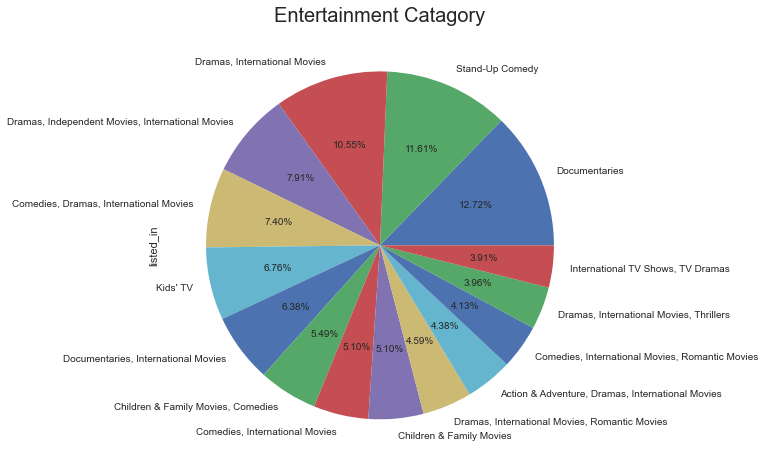

In [21]:
plt.style.use('seaborn')


df['listed_in'].value_counts().head(15).plot.pie(figsize = (15, 8), autopct='%1.2f%%')

plt.title('Entertainment Catagory',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()